In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd 

In [ ]:
from glob import glob

PATH = "/content/drive/MyDrive/NineJH/dataset"

file_list = glob(f"{PATH}/*.csv")
file_list

In [ ]:
customer =  pd.read_csv(f"{PATH}/olist_customers_dataset.csv")
geo =  pd.read_csv(f"{PATH}/olist_geolocation_dataset.csv")
items =  pd.read_csv(f"{PATH}/olist_order_items_dataset.csv")
payments = pd.read_csv(f"{PATH}/olist_order_payments_dataset.csv")
reviews = pd.read_csv(f"{PATH}/olist_order_reviews_dataset.csv")
orders = pd.read_csv(f"{PATH}/olist_orders_dataset.csv")
products = pd.read_csv(f"{PATH}/olist_products_dataset.csv")
sellers =  pd.read_csv(f"{PATH}/olist_sellers_dataset.csv")
name =  pd.read_csv(f"{PATH}/product_category_name_translation.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from math import radians, cos, sin, asin, sqrt

def geodistance(lng1,lat1,lng2,lat2):
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)])
    d_lon=lng2-lng1
    d_lat=lat2-lat1
    a=sin(d_lat/2)**2 + cos(lat1) * cos(lat2) * sin(d_lon/2)**2
    distance=2*asin(sqrt(a))*6371*1000 
    distance=round(distance/1000,3)
    return distance

In [ ]:
geo

In [ ]:
#아웃라이어 제거 
geo = geo[geo['geolocation_lat'] <= 5.27438888]
geo = geo[geo['geolocation_lng'] >= -73.98283055]
geo = geo[geo['geolocation_lat'] >= -33.75116944]
geo = geo[geo['geolocation_lng'] <=  -34.79314722]

fig = plt.figure(figsize=(8,10))
sns.scatterplot(data = geo ,x='geolocation_lng', y='geolocation_lat', hue  ='geolocation_state', style = 'geolocation_state')

## Join

In [ ]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)

In [ ]:
geo

In [ ]:
df_customer_order = pd.merge(orders, customer, on = 'customer_id', how = 'inner')
df_customer_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
df_seller_item = pd.merge(items , sellers, on='seller_id', how = 'inner')
df_seller_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP


In [ ]:
df_customer_seller_prefix = pd.merge(df_customer_order, df_seller_item, on = 'order_id', how ='inner')
df_customer_seller_prefix

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602,tupa,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290,sao paulo,SP
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG


In [ ]:
total = pd.merge(products, df_customer_seller_prefix, on ='product_id', how='inner')
total = pd.merge(total, name , on='product_category_name', how='inner')

In [ ]:
total['product_category_name'] = total['product_category_name_english']

In [ ]:
total.drop('product_category_name_english', axis='columns')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,customer_city,customer_state,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,mogi-guacu,SP,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,...,sao paulo,SP,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1026,sao paulo,SP
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,...,santana de parnaiba,SP,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1026,sao paulo,SP
3,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0,a84a0bd528e053f6b266e21bb1111e3f,...,cachoeiras de macacu,RJ,1,620c87c171fb2a6dd6e8bb4dec959fc6,2018-07-09 20:31:35,319.90,15.45,25645,petropolis,RJ
4,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,rio de janeiro,RJ,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,13030,campinas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,d4e8d3bb5e3673ed68ac154fe86de946,...,passo fundo,RS,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11,12327,jacarei,SP
111019,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,9c782cb7854e5dfa91927cfca8949eb8,...,rio de janeiro,RJ,1,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11,12327,jacarei,SP
111020,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,615ca9b2afeaf5644ae8cef64797132e,...,porto alegre,RS,1,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,12327,jacarei,SP
111021,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,615ca9b2afeaf5644ae8cef64797132e,...,porto alegre,RS,2,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,12327,jacarei,SP


## Geo

In [ ]:
# total.to_csv('all_data_Olist.csv',index=False)

In [ ]:
geo_code = geo[['geolocation_zip_code_prefix']].apply(pd.value_counts).sum(1)
# sum(0)했을때는 전체합계가 나온다 !!.. 슁ㅇ기..!! 

In [ ]:
geo = geo.assign(zip_code_count = geo['geolocation_zip_code_prefix'].map(geo_code)).drop_duplicates(['geolocation_zip_code_prefix'])
geo = geo.sort_values(by='zip_code_count', ascending = False)
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_count
470805,24220,-22.905817,-43.106989,niteroi,RJ,1146
470806,24230,-22.911270,-43.105151,niterói,RJ,1102
645450,38400,-18.915960,-48.278974,uberlandia,MG,965
594039,35500,-20.146615,-44.892592,divinopolis,MG,907
256708,11680,-23.431627,-45.077229,ubatuba,SP,879
...,...,...,...,...,...,...
748588,62948,-5.243330,-38.480560,morada nova,CE,1
748483,62922,-5.083045,-37.911181,lagoinha,CE,1
748454,62908,-4.995000,-38.003330,sao joao de deus,CE,1
810091,76244,-15.897244,-52.233865,aragarças,GO,1


In [ ]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 470805 to 193172
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19010 non-null  int64  
 1   geolocation_lat              19010 non-null  float64
 2   geolocation_lng              19010 non-null  float64
 3   geolocation_city             19010 non-null  object 
 4   geolocation_state            19010 non-null  object 
 5   zip_code_count               19010 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.0+ MB


In [ ]:
df_loc = total[['seller_zip_code_prefix','customer_zip_code_prefix']]
df_loc.shape

(111023, 2)

In [ ]:
seller_customer_loc = pd.merge(df_loc, geo.rename(columns = {'geolocation_zip_code_prefix':'seller_zip_code_prefix'}) , on = 'seller_zip_code_prefix', how='inner')

In [ ]:
seller_customer_loc = seller_customer_loc.rename(columns = {
                            'geolocation_lat':'seller_lat',
                            'geolocation_lng':'seller_lng',
                            'geolocation_city':'seller_city',
                            'geolocation_state':'seller_state'
                            })
seller_customer_loc.shape

(110771, 7)

In [ ]:
seller_customer_loc = pd.merge(seller_customer_loc, geo.rename(columns = {'geolocation_zip_code_prefix':'customer_zip_code_prefix'}) , on = 'customer_zip_code_prefix', how='inner')
seller_customer_loc = seller_customer_loc.rename(columns = {
                            'geolocation_lat':'customer_lat',
                            'geolocation_lng':'customer_lng',
                            'geolocation_city':'customer_city',
                            'geolocation_state':'customer_state'
                            })
seller_customer_loc.shape

(110475, 12)

In [ ]:
seller_customer_loc

,seller_zip_code_prefix,customer_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state,zip_code_count_x,customer_lat,customer_lng,customer_city,customer_state,zip_code_count_y
0,3694,13848,-23.537922,-46.477696,sao paulo,SP,112,-22.331249,-46.922580,mogi guaçu,SP,194
1,22230,13848,-22.937816,-43.176199,rio de janeiro,RJ,420,-22.331249,-46.922580,mogi guaçu,SP,194
2,5849,13848,-23.651115,-46.755211,sao paulo,SP,88,-22.331249,-46.922580,mogi guaçu,SP,194
3,14050,13848,-21.171217,-47.819418,ribeirao preto,SP,169,-22.331249,-46.922580,mogi guaçu,SP,194
4,35570,13848,-20.474084,-45.424321,formiga,MG,445,-22.331249,-46.922580,mogi guaçu,SP,194
...,...,...,...,...,...,...,...,...,...,...,...,...
110470,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4
110471,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4
110472,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4
110473,74560,13302,-16.663544,-49.272649,goiânia,GO,31,-23.264240,-47.273847,itu,SP,9


## 위 경도 좌표 사이 거리 구하기 
흥미로운 시작이지만 위도와 경도 선 사이의 거리가 있기 때문에 지리학에는 적용되지 않습니다. 같지 않은 거리 떨어져서. 적도에 가까워 질수록 위 도선은 더 멀어집니다. 어떤 종류의 간단한 삼각 측량 방정식을 사용하면 지구의 곡률로 인해 한 위치에서는 거리를 정확하게 측정하고 다른 위치에서는 매우 잘못 측정 할 수 있습니다.

- haversine distance
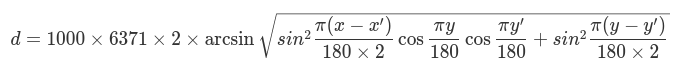

- https://blog.naver.com/parkjy76/221452882803

In [ ]:
from math import radians , cos, sin, asin, sqrt 
from tqdm import tqdm
def geo_dist(x1, y1, x2, y2 ):
    x1, y1, x2, y2 = map(radians , [x1,y1,x2,y2])
    d_lng = x2 - x1
    d_lat = y2 - y1
    a = sin(d_lat/2)**2 + cos(y1) * cos(y2) * sin(d_lng/2)**2
    dist = round((2*asin(sqrt(a))*6371*1000)/1000,3)
    return dist 


A = seller_customer_loc['seller_lng']
B = seller_customer_loc['seller_lat']
C = seller_customer_loc['customer_lng']
D = seller_customer_loc['customer_lat']
seller_customer_loc['dist']  = seller_customer_loc['seller_lat']
for idx, v in tqdm(enumerate(zip(A,B,C,D))):
    seller_customer_loc['dist'].loc[idx] = geo_dist(*v)
seller_customer_loc

0it [00:00, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
110475it [00:31, 3501.43it/s]


,seller_zip_code_prefix,customer_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state,zip_code_count_x,customer_lat,customer_lng,customer_city,customer_state,zip_code_count_y,dist
0,3694,13848,-23.537922,-46.477696,sao paulo,SP,112,-22.331249,-46.922580,mogi guaçu,SP,194,141.699
1,22230,13848,-22.937816,-43.176199,rio de janeiro,RJ,420,-22.331249,-46.922580,mogi guaçu,SP,194,390.351
2,5849,13848,-23.651115,-46.755211,sao paulo,SP,88,-22.331249,-46.922580,mogi guaçu,SP,194,147.759
3,14050,13848,-21.171217,-47.819418,ribeirao preto,SP,169,-22.331249,-46.922580,mogi guaçu,SP,194,158.799
4,35570,13848,-20.474084,-45.424321,formiga,MG,445,-22.331249,-46.922580,mogi guaçu,SP,194,258.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110470,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110471,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110472,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110473,74560,13302,-16.663544,-49.272649,goiânia,GO,31,-23.264240,-47.273847,itu,SP,9,763.069


In [ ]:
# seller_customer_loc.to_csv('geo_dist_olist.csv', index=False)

In [ ]:
seller_customer_loc[['seller_city','customer_city']]

,seller_city,customer_city
0,sao paulo,mogi guaçu
1,rio de janeiro,mogi guaçu
2,sao paulo,mogi guaçu
3,ribeirao preto,mogi guaçu
4,formiga,mogi guaçu
...,...,...
110470,goiânia,alto alegre do iguacu
110471,goiânia,alto alegre do iguacu
110472,goiânia,alto alegre do iguacu
110473,goiânia,itu


In [ ]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_count
470805,24220,-22.905817,-43.106989,niteroi,RJ,1146
470806,24230,-22.911270,-43.105151,niterói,RJ,1102
645450,38400,-18.915960,-48.278974,uberlandia,MG,965
594039,35500,-20.146615,-44.892592,divinopolis,MG,907
256708,11680,-23.431627,-45.077229,ubatuba,SP,879
...,...,...,...,...,...,...
748588,62948,-5.243330,-38.480560,morada nova,CE,1
748483,62922,-5.083045,-37.911181,lagoinha,CE,1
748454,62908,-4.995000,-38.003330,sao joao de deus,CE,1
810091,76244,-15.897244,-52.233865,aragarças,GO,1


In [ ]:
total

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,customer_state,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,SP,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,...,SP,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1026,sao paulo,SP,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,...,SP,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1026,sao paulo,SP,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0,a84a0bd528e053f6b266e21bb1111e3f,...,RJ,1,620c87c171fb2a6dd6e8bb4dec959fc6,2018-07-09 20:31:35,319.90,15.45,25645,petropolis,RJ,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,RJ,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,13030,campinas,SP,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,d4e8d3bb5e3673ed68ac154fe86de946,...,RS,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11,12327,jacarei,SP,cds_dvds_musicals
111019,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,9c782cb7854e5dfa91927cfca8949eb8,...,RJ,1,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11,12327,jacarei,SP,cds_dvds_musicals
111020,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,615ca9b2afeaf5644ae8cef64797132e,...,RS,1,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,12327,jacarei,SP,cds_dvds_musicals
111021,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,47.0,117.0,2.0,550.0,35.0,15.0,25.0,615ca9b2afeaf5644ae8cef64797132e,...,RS,2,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,12327,jacarei,SP,cds_dvds_musicals


In [ ]:
seller_customer_loc

,seller_zip_code_prefix,customer_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state,zip_code_count_x,customer_lat,customer_lng,customer_city,customer_state,zip_code_count_y,dist
0,3694,13848,-23.537922,-46.477696,sao paulo,SP,112,-22.331249,-46.922580,mogi guaçu,SP,194,141.699
1,22230,13848,-22.937816,-43.176199,rio de janeiro,RJ,420,-22.331249,-46.922580,mogi guaçu,SP,194,390.351
2,5849,13848,-23.651115,-46.755211,sao paulo,SP,88,-22.331249,-46.922580,mogi guaçu,SP,194,147.759
3,14050,13848,-21.171217,-47.819418,ribeirao preto,SP,169,-22.331249,-46.922580,mogi guaçu,SP,194,158.799
4,35570,13848,-20.474084,-45.424321,formiga,MG,445,-22.331249,-46.922580,mogi guaçu,SP,194,258.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110470,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110471,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110472,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110473,74560,13302,-16.663544,-49.272649,goiânia,GO,31,-23.264240,-47.273847,itu,SP,9,763.069


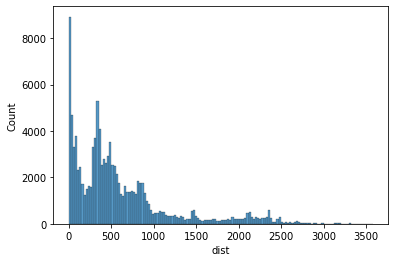

In [ ]:
sns.histplot(seller_customer_loc.dist)

In [ ]:
geoproduct = total[['price','seller_city','customer_city']]
city_sales = pd.DataFrame()
city_sales = geoproduct.groupby(by = 'customer_city',as_index = False).agg({'price':sum})
city_sales.sort_values(by = 'price',ascending= False,inplace = True)

city_sales

,customer_city,price
3576,sao paulo,1886128.28
3136,rio de janeiro,980899.05
451,belo horizonte,350175.53
556,brasilia,299235.34
1139,curitiba,209901.64
...,...,...
1948,jenipapo de minas,7.48
3384,santo antonio do rio abaixo,6.00
3654,senador jose porfirio,6.00
3202,sabaudia,5.90


In [ ]:
# city_sales = city_sales.reset_index(drop = True)
# city_sales
# tmp = city_sales.loc[:9]
# # tmp['price'] = tmp['price'].apply(np.log10)
# ax = sns.barplot(x = 'seller_city', y = 'price',data = tmp)
# ax.set(title = 'the distribution of sales on seller_city')
# ax.set_xticklabels(labels = tmp['seller_city'],rotation = 45)

In [ ]:
df1 = seller_customer_loc[['seller_city','customer_city']]
df1['seller_customer_pair'] = df1.apply(lambda x: (x['seller_city'], x['customer_city']), axis = 1)

seller_single = df1[['seller_city']].apply(pd.value_counts).sum(1)
customer_single = df1[['customer_city']].apply(pd.value_counts).sum(1)
df1 = df1.assign(seller_count = df1['seller_city'].map(seller_single))
df1 = df1.assign(customer_count = df1['seller_city'].map(customer_single))
df1['single_count'] = df1['seller_count'] + df1['customer_count']

pair = df1[['seller_customer_pair']].apply(pd.value_counts).sum(1)
df1 = df1.assign(pair_count = df1['seller_customer_pair'].map(pair))
df1.drop_duplicates('seller_customer_pair', inplace = True)
df1 = df1.reset_index(drop = True)

counts = 0
for i in range(df1.shape[0]):
    counts = counts + df1.loc[i,'pair_count']

df2 = df1.drop_duplicates('seller_city', inplace = False)
df2.sort_values(by = 'single_count', ascending= False, inplace = True)
df2 = df2.reset_index(drop = True)

print('the total number of orders ', counts)
print('the total number of distinct seller & customer_cities ', df2.shape[0])

x_axis = df2.loc[:9,'seller_city'].to_numpy()
y_axis = x_axis

xy = [[0 for i in range(len(x_axis))] for i in range(len(x_axis))]
              
for i in range(df1.shape[0]):
    for ix in range(len(x_axis)):
        if(x_axis[ix] == df1.loc[i,'seller_city']):
            for iy in range(len(y_axis)):
                if(y_axis[iy] == df1.loc[i,'customer_city']):
                    xy[ix][iy] = df1.loc[i,'pair_count']


<ipython-input-35-b5e2dbc0c3a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['seller_customer_pair'] = df1.apply(lambda x: (x['seller_city'], x['customer_city']), axis = 1)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


the total number of orders  110475
the total number of distinct seller & customer_cities  588
[[3368, 1313, 2, 556, 558, 359, 151, 311, 347, 98], [270, 324, 0, 43, 73, 44, 12, 19, 16, 6], [1158, 602, 1, 178, 224, 69, 48, 81, 132, 41], [699, 334, 2, 148, 125, 55, 39, 52, 68, 10], [242, 174, 0, 46, 152, 40, 13, 26, 27, 10], [370, 209, 0, 39, 101, 128, 13, 25, 41, 14], [344, 154, 1, 74, 45, 24, 15, 34, 33, 11], [272, 104, 0, 66, 40, 30, 20, 29, 46, 12], [205, 98, 1, 23, 29, 18, 12, 18, 37, 6], [324, 181, 0, 58, 72, 42, 13, 27, 28, 18]]


[Text(0, 0.5, 'sao paulo'),
 Text(0, 1.5, 'rio de janeiro'),
 Text(0, 2.5, 'ibitinga'),
 Text(0, 3.5, 'são paulo'),
 Text(0, 4.5, 'belo horizonte'),
 Text(0, 5.5, 'curitiba'),
 Text(0, 6.5, 'santo andre'),
 Text(0, 7.5, 'guarulhos'),
 Text(0, 8.5, 'campinas'),
 Text(0, 9.5, 'ribeirao preto')]

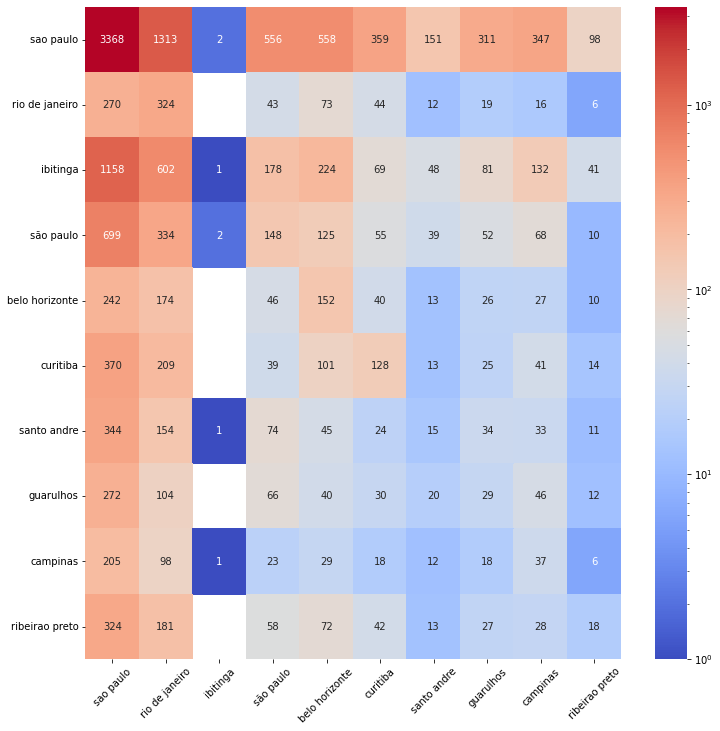

In [ ]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (12,12))
ax = sns.heatmap(xy, cmap = 'coolwarm', annot = True, fmt='g', norm = LogNorm())
ax.set_xticklabels(x_axis, rotation = '45')
ax.set_yticklabels(y_axis, rotation = 'horizontal')

In [ ]:
seller_customer_loc

,seller_zip_code_prefix,customer_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state,zip_code_count_x,customer_lat,customer_lng,customer_city,customer_state,zip_code_count_y,dist
0,3694,13848,-23.537922,-46.477696,sao paulo,SP,112,-22.331249,-46.922580,mogi guaçu,SP,194,141.699
1,22230,13848,-22.937816,-43.176199,rio de janeiro,RJ,420,-22.331249,-46.922580,mogi guaçu,SP,194,390.351
2,5849,13848,-23.651115,-46.755211,sao paulo,SP,88,-22.331249,-46.922580,mogi guaçu,SP,194,147.759
3,14050,13848,-21.171217,-47.819418,ribeirao preto,SP,169,-22.331249,-46.922580,mogi guaçu,SP,194,158.799
4,35570,13848,-20.474084,-45.424321,formiga,MG,445,-22.331249,-46.922580,mogi guaçu,SP,194,258.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110470,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110471,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110472,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110473,74560,13302,-16.663544,-49.272649,goiânia,GO,31,-23.264240,-47.273847,itu,SP,9,763.069


In [ ]:
seller_product = total.groupby('seller_id')['product_category_name'].unique()

product_by_seller = [] 
for i in seller_product.values.tolist():
    product_by_seller.append(i.tolist())
product_by_seller

[['small_appliances'],
 ['garden_tools', 'construction_tools_construction'],
 ['sports_leisure'],
 ['furniture_decor'],
 ['bed_bath_table'],
 ['housewares'],
 ['health_beauty'],
 ['fashion_bags_accessories'],
 ['bed_bath_table', 'furniture_mattress_and_upholstery'],
 ['computers_accessories'],
 ['computers_accessories'],
 ['kitchen_dining_laundry_garden_furniture'],
 ['health_beauty'],
 ['costruction_tools_tools'],
 ['baby', 'fashion_shoes', 'stationery'],
 ['garden_tools',
  'signaling_and_security',
  'kitchen_dining_laundry_garden_furniture'],
 ['cool_stuff', 'stationery'],
 ['bed_bath_table'],
 ['health_beauty'],
 ['computers_accessories'],
 ['baby',
  'housewares',
  'cool_stuff',
  'home_appliances',
  'bed_bath_table',
  'small_appliances',
  'air_conditioning',
  'home_appliances_2'],
 ['watches_gifts'],
 ['sports_leisure',
  'baby',
  'toys',
  'health_beauty',
  'garden_tools',
  'home_construction',
  'construction_tools_construction'],
 ['health_beauty'],
 ['furniture_decor

In [ ]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
total[['customer_id','product_category_name']]

,customer_id,product_category_name
0,f8a3e963a310aa58b60a5b1fed5bceb5,perfumery
1,c15eed3881abc9e06763c989679c5094,perfumery
2,12a2c614dfc8926e793516b1638c7471,perfumery
3,2a9f4bad138e972730f8289c0ea9ed74,perfumery
4,6d699e3ab0fd90fffb3d1379d937de77,perfumery
...,...,...
111018,63155d2512ff588adce41f3fb43f6a6d,cds_dvds_musicals
111019,9cedc9b5217be6c8cb89e73ce5390c1e,cds_dvds_musicals
111020,f81bb64a1e672e6cbd0e027046db8533,cds_dvds_musicals
111021,f81bb64a1e672e6cbd0e027046db8533,cds_dvds_musicals


In [ ]:
customer_product = total.groupby('customer_id')['product_category_name'].unique()

product_by_customer = [] 
for i in customer_product.values.tolist():
    product_by_customer.append(i.tolist())
product_by_customer

[['toys'],
 ['health_beauty'],
 ['baby'],
 ['cool_stuff'],
 ['bed_bath_table'],
 ['sports_leisure'],
 ['fashion_bags_accessories'],
 ['toys'],
 ['fashion_bags_accessories'],
 ['pet_shop'],
 ['bed_bath_table'],
 ['health_beauty'],
 ['garden_tools'],
 ['baby'],
 ['garden_tools'],
 ['furniture_decor'],
 ['bed_bath_table'],
 ['sports_leisure'],
 ['health_beauty'],
 ['telephony'],
 ['health_beauty'],
 ['bed_bath_table'],
 ['housewares'],
 ['bed_bath_table'],
 ['consoles_games'],
 ['perfumery'],
 ['sports_leisure'],
 ['furniture_decor'],
 ['telephony'],
 ['bed_bath_table'],
 ['bed_bath_table'],
 ['fixed_telephony'],
 ['housewares'],
 ['stationery'],
 ['pet_shop'],
 ['luggage_accessories'],
 ['cool_stuff'],
 ['housewares'],
 ['cool_stuff'],
 ['electronics'],
 ['food_drink'],
 ['health_beauty'],
 ['housewares'],
 ['health_beauty'],
 ['small_appliances'],
 ['cool_stuff'],
 ['stationery'],
 ['bed_bath_table'],
 ['bed_bath_table'],
 ['watches_gifts'],
 ['furniture_decor'],
 ['bed_bath_table'],
 [

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=c22fddfe9ff0b2b46b4969fe800ed21ad9a66d2bc31f3e84fb7d3b4a58d64a19
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:
len(product_by_seller)

3033

In [ ]:
from apyori import apriori as apr 
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

# 연관분석
word_network = (list(apr(product_by_seller, min_support=0.01)))
df=pd.DataFrame(word_network)
df['length']=df['items'].apply(lambda x: len(x))

# length가 2인 row만 가져오기 
# 타이틀 내 동시출현하는 2개 단어들을 의미 
df.shape

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
te = TransactionEncoder()
te_result = te.fit(product_by_seller).transform(product_by_seller, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_result, columns=te.columns_)

In [ ]:
te = TransactionEncoder()
te_cs = te.fit(product_by_customer).transform(product_by_customer,sparse=True)
te_cs = pd.DataFrame.sparse.from_spmatrix(te_cs, columns=te.columns_)
te_cs

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97251,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
97252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
97253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97254,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
itemset = apriori(te_df,
                           min_support=0.01, 
                           max_len=3, 
                           use_colnames=True, 
                          )
itemset.sort_values(by='support', ascending=False)

,support,itemsets
24,0.162216,(health_beauty)
38,0.158589,(sports_leisure)
28,0.154303,(housewares)
4,0.126278,(auto)
21,0.121991,(furniture_decor)
...,...,...
118,0.010551,"(electronics, telephony, computers_accessories)"
95,0.010551,"(toys, furniture_decor)"
114,0.010221,"(housewares, sports_leisure, auto)"
116,0.010221,"(sports_leisure, cool_stuff, computers_accesso..."


In [ ]:
from mlxtend.frequent_patterns import association_rules
metrics = association_rules(itemset[], metric="confidence", min_threshold=0.1) 
metrics.sort_values(by='lift', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
141,(telephony),"(computers_accessories, cool_stuff)",0.049126,0.020772,0.011540,0.234899,11.308725,0.010519,1.279869
140,"(computers_accessories, cool_stuff)",(telephony),0.020772,0.049126,0.011540,0.555556,11.308725,0.010519,2.139466
146,"(computers_accessories, telephony)",(electronics),0.021101,0.049126,0.010551,0.500000,10.177852,0.009514,1.901747
147,(electronics),"(computers_accessories, telephony)",0.049126,0.021101,0.010551,0.214765,10.177852,0.009514,1.246632
145,"(electronics, computers_accessories)",(telephony),0.022420,0.049126,0.010551,0.470588,9.579155,0.009449,1.796095
...,...,...,...,...,...,...,...,...,...
49,(computers_accessories),(health_beauty),0.094626,0.162216,0.013518,0.142857,0.880662,-0.001832,0.977415
50,(computers_accessories),(housewares),0.094626,0.154303,0.012529,0.132404,0.858081,-0.002072,0.974760
8,(auto),(furniture_decor),0.126278,0.121991,0.012859,0.101828,0.834712,-0.002546,0.977550
7,(furniture_decor),(auto),0.121991,0.126278,0.012859,0.105405,0.834712,-0.002546,0.976669


In [ ]:
itemset_cs = apriori(te_cs,
                           min_support=0.0005, 
                           max_len=3, 
                           use_colnames=True, 
                          )
itemset_cs.sort_values(by='support', ascending=False)

,support,itemsets
6,0.096827,(bed_bath_table)
35,0.090853,(health_beauty)
52,0.079378,(sports_leisure)
13,0.068777,(computers_accessories)
32,0.066310,(furniture_decor)
40,0.060500,(housewares)
57,0.057827,(watches_gifts)
55,0.043175,(telephony)
4,0.040070,(auto)
56,0.039956,(toys)


In [ ]:
from mlxtend.frequent_patterns import association_rules
metrics = association_rules(itemset_cs, metric="confidence", min_threshold=0.01) 
metrics.sort_values(by='lift', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(furniture_decor),(bed_bath_table),0.06631,0.096827,0.00072,0.010854,0.112101,-0.005701,0.913084


lift(향상도) 수치가 1보다 큰것들이 있는데, 1보다 클수록 우연히 일어나지 않았다는 표시다. 아무런 관계가 없다면 1로 표시된다.

In [ ]:
!pip install scipy==1.8.0
!pip install networkx==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [ ]:
# 노드의 크기는 해당 단어의 연결 중심성 크기를 나타낸 것이며 이는 해당 단어가 얼마나 많이 출현했는지, 즉 얼마나 중요한지를 의미 
import networkx as nx
import numpy as np

df = df[(df['length']==2) &(df['support'] >=0.02)].sort_values(by='support', ascending =False)

G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

#노드 순위 지정 위해 페이지랭크 계산
pr=nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
               
pos = nx.kamada_kawai_layout(G)
                  
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.5, edge_color='10', cmap=plt.cm.Blues);

plt.title('Product by Seller',fontsize=20);
plt.show();

AttributeError: ignored